# Assignment

### Below are the instructions for the assignment. Please read and follow them carefully.


1.   There are 3 parts in this assignment and **none** are optional.
2.   Answer/code for each question is to be written in the code cell following the question.
3.   **Do not** edit this notebook. Make a copy in your drive to solve the assignment.
3.   The csv files mentioned in the assignment, ```cepheids.csv``` and ```curves.csv``` can be downloaded and used from this [Drive link](https://drive.google.com/drive/folders/17DkvsU0GVGOnffZCsgkkp5A3SbQRTWQf?usp=sharing).
2.   Comment your code wherever needed.
3.   The resources that may be required for help and reference are uploaded on this [github repo](https://github.com/krittikaiitb/tutorials).

# All The Best!!



# Cepheids

Cepheids are a type of variable star that pulsate radially, varying in both diameter and temperature, which produces changes in brightness with a well-defined stable period and amplitude. These stars are significant in the field of astronomy for several reasons:

1. **Standard Candles**: Cepheids have a well-established relationship between their luminosity and pulsation period, known as the Leavitt law or period-luminosity relation. This makes them excellent standard candles for measuring astronomical distances.

2. **Distance Measurement**: By observing the period of a Cepheid's brightness variations, astronomers can determine its absolute magnitude. Comparing this with the apparent magnitude allows for the calculation of the distance to the star, which is crucial for mapping the scale of the universe.

3. **Galactic and Extragalactic Studies**: Cepheids are used to measure distances within our galaxy and to nearby galaxies. This helps in understanding the structure and scale of the Milky Way and the local group of galaxies.

4. **Historical Importance**: The discovery of Cepheids in the Andromeda galaxy by Edwin Hubble was pivotal in establishing that the universe is expanding, leading to the formulation of the Big Bang theory.

Cepheids continue to be a vital tool in modern astrophysics, aiding in the calibration of other distance measurement methods and contributing to our understanding of the cosmos.

# Part 1

The data in ```cepheids.csv``` is organised in two columns: the period of the cepheid variable and its absolute magnitude calculated from mean luminosity.

These two values are actually related by the Leavitt law:
$$M = a \cdot \log_{10}{P} + b$$

First, find the constants $a$ and $b$ in this relation to fit the given data.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

def Leavitt(P,a,b):
    return a*np.log10(P)+b

df=pd.read_csv("cepheids.csv")
P=np.array(df["Period"])
M=np.array(df["M"])

params,covarience = curve_fit(Leavitt, P, M)
a,b=params
print(f"The values found by fitting the function of Leavitt law are >> a = {a:.4f} and b = {b:.4f} ")


The values found by fitting the function of Leavitt law are >> a = -2.2164 and b = -1.6809 


Next, plot the data along with your fitted line to visually verify that you have found the correct constants.

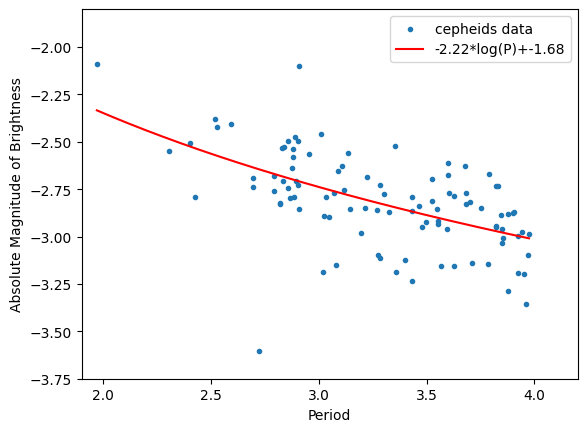

In [2]:
import matplotlib.pyplot as plt
X=np.arange(np.min(P),np.max(P),0.001)
plt.xlabel("Period")
plt.ylabel("Absolute Magnitude of Brightness")
plt.axis([1.9, 4.2, -3.75, -1.8])
plt.scatter(P,M,marker=".",label="cepheids data")
#Fitted curve
plt.plot(X, Leavitt(X,a,b),color="red",label=f"{a:.2f}*log(P)+{b:.2f}")
plt.legend()

# Part 2

Now we are ready to use the result we have obtained from the above markdown to solve the problem.

Given in the ```curves.csv``` file is the data of the light curves of many cepheids in the line of sight of a galaxy. The data contains three columns: ID(Unique for every cepheid), JD (the julian date of observation) and the apparent magnitude observed.

First we need to find the period of each cepheid.

In [3]:
#In this i did following,

#for every star
#First subtracted mean of magnitude values from all magnitude values,
#And then found peaks using find_peaks
#Then found the corresponding peak times
#Then found the difference between peak times,
#But there was a big gaps in datas
#That was giving around 200days, 300days for some peak difference
#so i took a threshold value of 100 days
#I replaced and Took 0 in its place
#Bcuz at that time no data was recorded but it was coming it time difference, 
#And then took average of all time difference,
#Found the period this way,

import pandas as pd
from scipy.signal import find_peaks

df = pd.read_csv("curves.csv")
unique_ids = df['ID'].unique()

#this function will return period of each star on giving ID of that star from df
def period_finder(df,ID):
    df_id=df[df["ID"]==ID]
    #seprating mag part
    mag=np.array(df_id["m"])
    
    #finding mean and finding the difference of each mag element with the mean
    mag_mean=np.mean(mag)
    for i in range(len(mag)):
        mag[i]=mag[i]-mag_mean
    
    #using find_peaks function finding the peaks time
    peaks, _ = find_peaks(mag, distance=2)
    peak_times = np.array(df_id["JD"].iloc[peaks])
    
    #finding mean peak time difference , which is the period of the star
    peak_times_diff = np.zeros(len(peak_times))
    for i in range(len(peak_times)-1):
        diff = peak_times[i+1]-peak_times[i]
        if diff<100:
            peak_times_diff[i] = diff
        else:
            continue
    period=np.mean(peak_times_diff)
    return period, mag_mean

results=[]
for i in range(len(unique_ids)):
    period, mean_app_mag = period_finder(df,unique_ids[i])
    results.append({
        'ID': unique_ids[i],
        'Estimated Period [JD]': period,
        'Mean apparant magnitude': mean_app_mag
    })
stars_data=pd.DataFrame(results)
print("the period of different stars are:\n",stars_data[['ID', 'Estimated Period [JD]']])

the period of different stars are:
           ID  Estimated Period [JD]
0    2434670               5.065699
1    2442608               4.186809
2    2443943               5.594184
3    2446727               4.107461
4    2447157               5.559579
..       ...                    ...
970   832653               6.163073
971  2190690               5.149831
972   566046               4.025616
973   188335               4.653134
974  1614138               7.367764

[975 rows x 2 columns]


Next, using the calculated periods, find the absolute magnitude of these stars using the relation you found earlier.



In [4]:
Abs_mag=[]
for i in range(len(unique_ids)):
    Abs_mag.append({
        'ID': unique_ids[i],
        'Absolute Magnitude': Leavitt(stars_data["Estimated Period [JD]"][i],a,b) #using the log relation with values of a and b we already found
    })
Absolute_magnitude=pd.DataFrame(Abs_mag)
stars_data=pd.merge(stars_data, Absolute_magnitude, how='left')

print("the absolute magnitude of different stars are:\n",stars_data[["ID","Absolute Magnitude"]])


the absolute magnitude of different stars are:
           ID  Absolute Magnitude
0    2434670           -3.242637
1    2442608           -3.059216
2    2443943           -3.338159
3    2446727           -3.040798
4    2447157           -3.332186
..       ...                 ...
970   832653           -3.431382
971  2190690           -3.258493
972   566046           -3.021424
973   188335           -3.160865
974  1614138           -3.603239

[975 rows x 2 columns]


Then, using the apparent magnitude data, find the distance to these cepheid variables.

In [5]:
def dist_finder(m,M):
    #m: apparant magnitude
    #M: absolute magnitude
    return 10**((m-M+5)/5)

dist=[]
for i in range(len(unique_ids)):
        dist.append({
        'ID': unique_ids[i],
        'distance': dist_finder(stars_data["Mean apparant magnitude"][i],stars_data["Absolute Magnitude"][i])
    })
distance=pd.DataFrame(dist)
stars_data=pd.merge(stars_data, distance, how='left')
print("The distance to different stars are:\n",stars_data[["ID","distance"]])

The distance to different stars are:
           ID      distance
0    2434670  1.156622e+06
1    2442608  1.085891e+06
2    2443943  8.532915e+05
3    2446727  2.405785e+04
4    2447157  9.495288e+05
..       ...           ...
970   832653  5.172465e+05
971  2190690  2.785734e+05
972   566046  3.018056e+05
973   188335  2.886153e+05
974  1614138  2.997041e+05

[975 rows x 2 columns]


Finally, find the distance to the galaxy being observed.

In [6]:
q1 = np.percentile(stars_data['distance'], 15)
q2 = np.percentile(stars_data['distance'], 85)

# Filtering the array for values within the range
filtered_array = stars_data['distance'][(stars_data['distance'] >= q1) & (stars_data['distance'] <= q2)]

# Calculate the mean of the filtered array
mean_in_range = np.mean(filtered_array)
print(f"Mean of distances after removing outliers: {mean_in_range:.4f} pc")

Mean of distances after removing outliers: 709330.0952 pc


# Part 3

Cepheid variable stars are known for their periodic changes in luminosity due to their pulsations. These stars exhibit a well-defined relationship between their pulsation period and intrinsic luminosity, known as the period-luminosity relation. However, the mechanism driving these pulsations involves complex interactions between radiation pressure, gas pressure, and opacity within the star's interior.

(a) Give a qualitative explanation of the thermal instability that leads to the pulsations in Cepheid variable stars, focusing on the role of the κ-mechanism (opacity mechanism).

# Thermal Instability and the κ-Mechanism in Cepheid Variables

Cepheid variable stars experience pulsations due to a thermal instability in their outer layers, driven by the κ-mechanism (opacity mechanism). This instability is caused by the interaction between radiation pressure, gas pressure, and the opacity of the material inside the star. When the star’s luminosity increases, it causes the temperature in the outer layers to rise, which in turn increases the opacity. As the opacity rises, radiation becomes trapped, preventing it from escaping efficiently. The trapped radiation increases internal pressure, leading to the expansion of the outer layers of the star.

As the outer layers expand, they cool, causing the opacity to decrease. With lower opacity, radiation can escape more easily, reducing the internal pressure and causing the star to contract. This cycle of expansion and contraction continues, creating periodic changes in the star’s luminosity. The pulsations are driven by the balance between increased opacity and radiation pressure, with the star undergoing thermal fluctuations as the opacity varies with the star's size and temperature. This mechanism is what causes the well-defined pulsation periods observed in Cepheid variable stars.